# SIMULACIÓN | LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = stats.binom.rvs(10,0.5,size=1000)

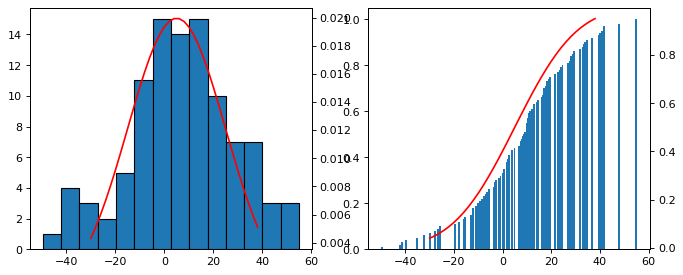

In [26]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=20
datos = stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()


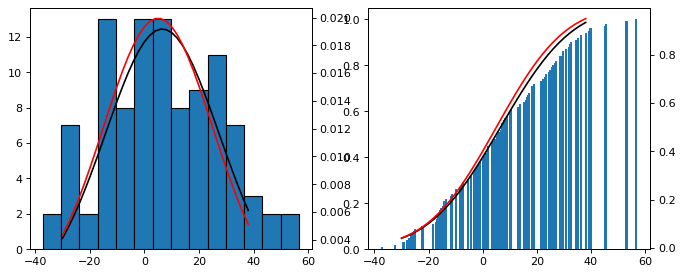

In [3]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


In [4]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm')

KstestResult(statistic=0.5524609258276614, pvalue=3.2537501137018646e-29)

In [5]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.0752957498683614, pvalue=0.5953980604958864)

In [6]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.05492734952755532, pvalue=0.9071647049613504)

In [7]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.064, pvalue=0.8317679359899082)

#### Ejercicio1: 
Repita el ejercicio con:

(i) una muestra de datos simulados de una v.a. discreta de su elección

(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

### Respuesta

### (i)

Datos simulados de una variable aleatoria discreta con distribución binomial.

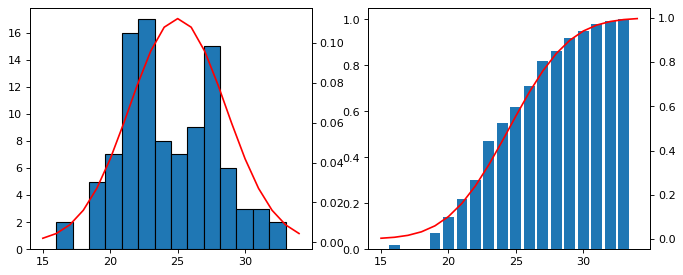

In [55]:
n = 50
p = 0.5
datos_binom = stats.binom.rvs(n=n, p=p, size=100) 

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)


axs[0].hist(datos_binom, edgecolor = 'black', bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(15,35,1)
##
dvec = []
for i in vec:
    dvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax1.plot(vec,dvec,color='red')

x, cum_binom = ecdf(datos_binom)
axs[1].bar(x, cum_binom)

## probabilidad teórica
ax2 = axs[1].twinx()
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec,color='red')
plt.draw()


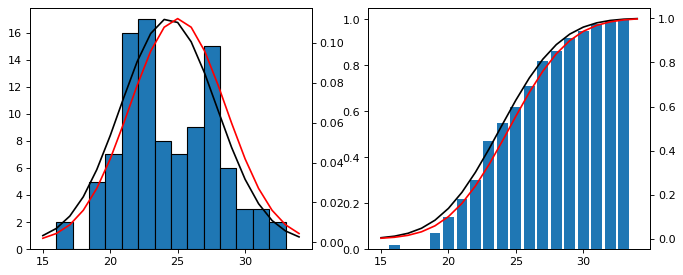

In [56]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
p_mv = 1/(50*100)*np.sum(datos_binom)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_binom, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(15,35,1)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.binom.pmf(k=i, n=n, p=p_mv))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_binom)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(15,35,1)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.binom.cdf(k=i, n=n, p=p_mv))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')

In [57]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos_binom, 'binom', args=(50,0.5))

KstestResult(statistic=0.13409448311731725, pvalue=0.04981856144026253)

In [58]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos_binom, 'binom', args=(50,p_mv))

KstestResult(statistic=0.10949196110187898, pvalue=0.1687462324218878)

In [59]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos_binom2 = stats.binom.rvs(n=n, p=p_mv , size=1000)
stats.kstest(datos_binom, datos_binom2)

KstestResult(statistic=0.09, pvalue=0.43274830596983316)

### (ii)

Datos simulados de una variable aleatoria continua con distribución exponencial con parámetro $\lambda$.

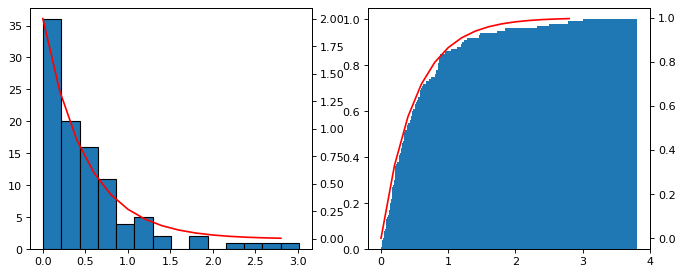

In [19]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
lamb = 2
datos_expon = stats.expon.rvs(scale = 1/lamb, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_expon, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = np.arange(0,3,0.2)
##
dvec = []
for i in vec:
    dvec.append(stats.expon.pdf(x=i, scale=1/lamb))
ax1.plot(vec,dvec,color='red')

x, cum_expon = ecdf(datos_expon)
axs[1].bar(x+.4, cum_expon)
## probabilidad teórica
ax2 = axs[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.expon.cdf(x=i, scale=1/lamb))
ax2.plot(vec,pvec,color='red')
plt.draw()

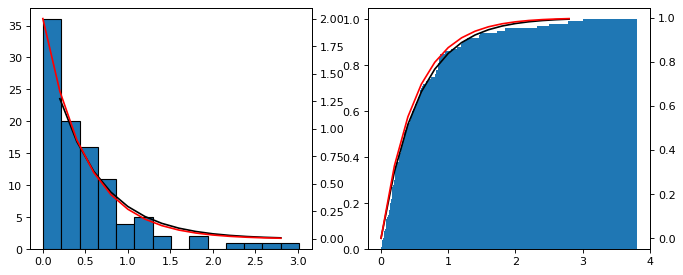

In [20]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
args = stats.expon.fit(datos_expon)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_expon, edgecolor = 'black', bins = int(70/5))
ax1 = axs[0].twinx()
##
dvec0 = []
for i in vec:
    dvec0.append(stats.expon.pdf(x=i, loc=args[0], scale=args[1]))
    
ax1.plot(vec[1:],dvec0[1:],color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x+.4,cum_expon)
## probabilidad teórica
ax2 = axs[1].twinx()

##
pvec0 = []
for i in vec:
    pvec0.append(stats.expon.cdf(x=i, loc=args[0], scale=args[1]))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()

In [49]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos_expon, 'expon')

KstestResult(statistic=0.2644521756831061, pvalue=1.1596948583288606e-06)

In [22]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos_expon, 'expon', args=(0, 1/lamb))

KstestResult(statistic=0.059273589601630816, pvalue=0.8529883373144584)

In [24]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos_expon, 'expon', args=(args))

KstestResult(statistic=0.05109732228562314, pvalue=0.944492452849752)

In [25]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.expon.rvs(loc=args[0], scale=args[1] ,size=1000)
stats.kstest(datos_expon, datos2)

KstestResult(statistic=0.057, pvalue=0.9160582672209162)

In [4]:
## Analizaremos que ocurre con datos reales
from datetime import datetime, timedelta
datos = pd.read_csv("data/grandesSismos.csv")
datos.head()




,Fecha_local,Fecha_local1,Hora_local,Latitud,Longitud,Magnitud_Ms
0,08-02-1570,08-02-1570,9:00,-36.8,-73.00,8.3
1,17-03-1575,17-03-1575,10:00,-33.4,-70.60,7.3
2,16-12-1575,16-12-1575,14:30,-39.8,-73.20,8.5
3,24-11-1604,24-11-1604,12:30,-18.5,-70.40,8.5
4,16-09-1615,16-09-1615,23:30,-18.5,-70.35,8.8


In [5]:
vec1 = datos['Fecha_local']
dtpo = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)
    

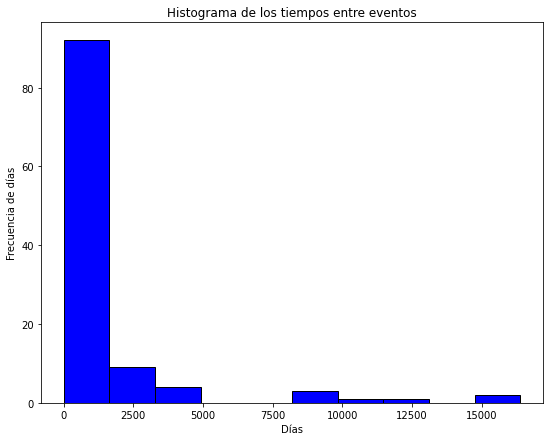

In [6]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

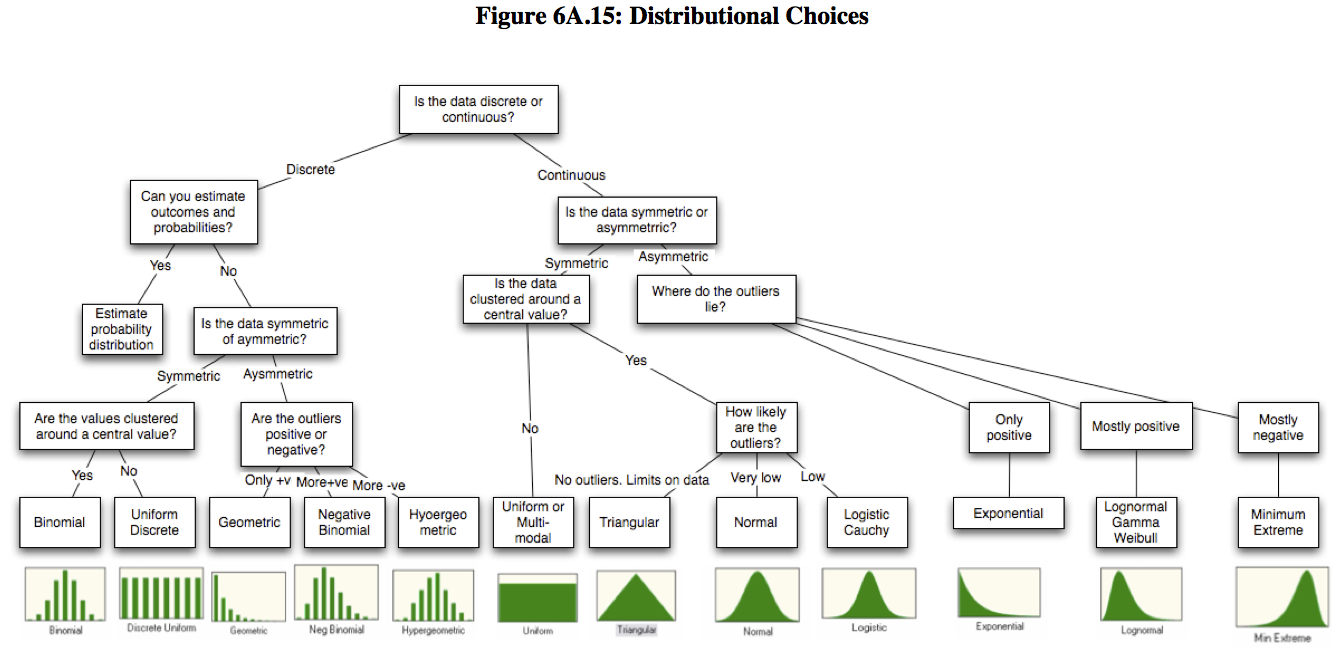

(0.0, 1457.3125)


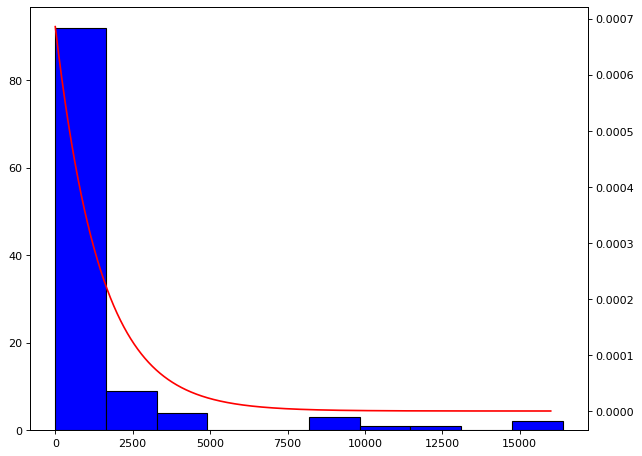

In [7]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo)
print(args)

vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()


In [8]:
datos2 = stats.expon.rvs(*args,size=200)

stats.kstest(dtpo, datos2)

KstestResult(statistic=0.30892857142857144, pvalue=1.4457618604524214e-06)

#### Ejercicio 2:

(i) Interprete el resultado. ¿Qué otros modelos es razonable considerar? ¿Qué filtro en los datos podría mejorar el ajuste?

(ii) Desarrolle alguno de los análisis propuestos en (i). Comente sus resultados.

### Respuesta

### (i)

In [9]:
# Calculamos media de la diferencia entre eventos de los datos obtenidos anteriormente. 
# Agregamos un poco de holgura para obtener la mayoría de datos un poco más "real" tal como se observa en el 
# histograma 

mean_freq = np.mean(dtpo)
size_data = datos.shape[0]
holgura = 500
print("Media de la diferencia de días entre eventos: {}".format(mean_freq))

cant_events_max_freq = len([i for i in dtpo if i < mean_freq+holgura])

print("\nCantidad de datos de estudio: {}".format(size_data))
print("Cantidad de sismos que ocurren con menos de {} días de diferencia: {}".format(round(mean_freq+holgura), cant_events_max_freq))
print("\nPorcentaje de sismos que ocurren con menos de {} días de diferencia: {}%".format(round(mean_freq+holgura), (cant_events_max_freq/size_data) * 100))

Media de la diferencia de días entre eventos: 1457.3125

Cantidad de datos de estudio: 114
Cantidad de sismos que ocurren con menos de 1957 días de diferencia: 93

Porcentaje de sismos que ocurren con menos de 1957 días de diferencia: 81.57894736842105%


### Interpretación de resultados 

Con respecto a los datos de grandes sismos, si observamos el histograma de tiempo entre eventos, podemos decir que, con frecuencia estos ocurren cercanos entre cada uno (con una media de 1457 días entre eventos aproximádamente, siendo 93 eventos ocurridos con menos de 1957 días). Por otro lado, podemos notar que aproximádamente un 18% de los sismos ocurren con más de 1957 días, lo que para este caso, es una minoría de los datos entregados. 

**Ajuste de distribución exponencial a los datos**

Al determinar la bondad de ajuste sobre la distribución exponencial ajustada con estimadores de MV obtenemos un valor-p de 2.55e-7, lo que es menor al grado de significancia de 5%. Esto quiere decir, que con 95% de probabilidad podemos rechazar la hipotesis nula H0 que nos dice que la distribución que siguen los datos es exponencial. 

### Filtración de datos para mejorar ajuste

Como filtro de datos se propone que el intervalo de tiempo entre sismos sea menor a 5000 días, ya que en este tramo de histograma anterior se observa una tendencia más clara que puede permitirnos modelar los datos de mejor manera.

In [17]:
# Filtrado de los datos
vec1 = datos['Fecha_local']
dtpo = []
dtpo_filtrado = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)
    if num < 5000:
        dtpo_filtrado.append(num)
        


### Modelos alternativos a considerar

### Distribución Exponencial

(0.0, 784.152380952381)


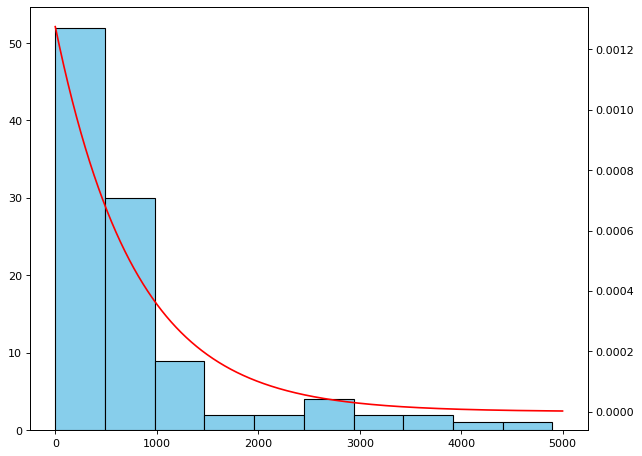

In [27]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo_filtrado, color = 'skyblue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo_filtrado)
print(args)

vec = list(range(5000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()

In [12]:
datos2 = stats.expon.rvs(*args,size=200)

stats.kstest(dtpo, datos2)

KstestResult(statistic=0.10678571428571429, pvalue=0.35580010420267827)

### Distribución Lognormal

(1.5584021197402707, -13.6153470850012, 483.2952638529925)


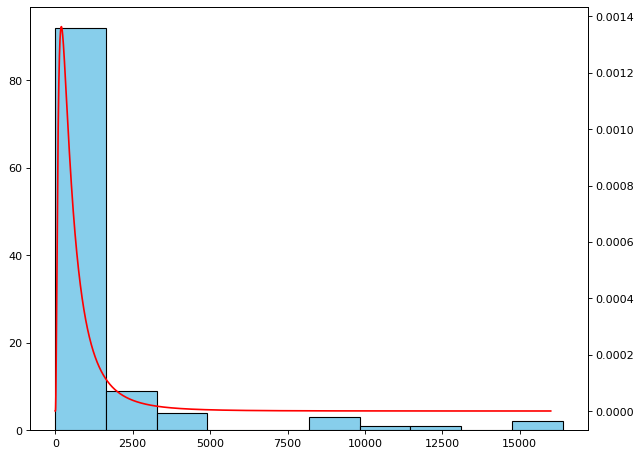

In [20]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'skyblue', edgecolor = 'black')
ax2 = ax.twinx()
lognorm_dis = stats.lognorm.fit(dtpo)
print(lognorm_dis)
s = 0.954
vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.lognorm.pdf(x=i, s=s, scale=args[2],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()




In [11]:
datos_lognorm = stats.lognorm.rvs(*lognorm_dis , size=200)

stats.kstest(dtpo, datos_lognorm)

KstestResult(statistic=0.14214285714285715, pvalue=0.09800987096054992)

### Distribución Gamma

(1.5584021197402707, -13.6153470850012, 483.2952638529925)


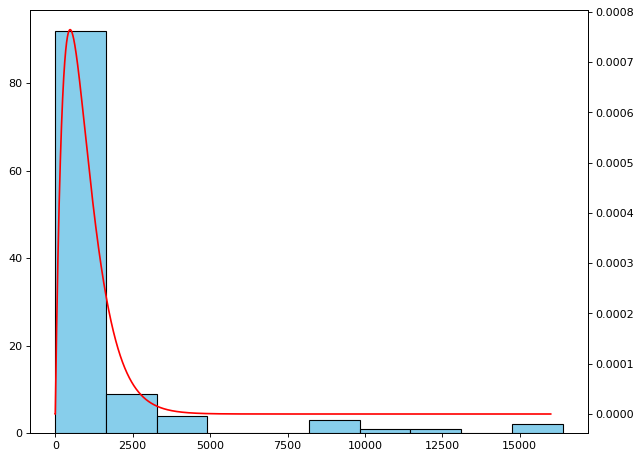

In [25]:
## ajuste de distribución gamma considerando Estimadores de MV

fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'skyblue', edgecolor = 'black')
ax2 = ax.twinx()
gamma_dis = stats.lognorm.fit(dtpo)
print(gamma_dis)
a = 1.99
vec = list(range(16000))
pvec_gamma = [stats.gamma.pdf(x=i, a=a, scale=gamma_dis[2], loc=gamma_dis[0]) for i in vec]

ax2.plot(vec,pvec_gamma, color='red')
plt.draw()

In [26]:
datos_gamma = stats.gamma.rvs(*gamma_dis , size=200)

stats.kstest(dtpo, datos_gamma)

KstestResult(statistic=0.13857142857142857, pvalue=0.1135613602506953)

**Interpretación de los datos para la distribución Gamma** 

Al determinar la bondad de ajuste sobre la distribución gamma ajustada con estimadores de máxima verosimilitud, obtuvimos un valor-p de 0.1486, lo que es mayor al grado de significancia de 5%. Esto quiere decir que no podemos rechazar la hipotesis nula H0 que nos dice que los datos siguen una distribución gamma. Complementando con esto, se puede apreciar que la distribución Gamma logra ajustarse de mejor forma a los datos proporcionados sin realizar aún un filtro de estos 

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.

### Respuesta

### Datos Región 1: Valdivia

       lat   long  prof  mag  Unnamed: 4  Unnamed: 5
0   -33.05 -71.06    69  5.2         NaN         NaN
1   -35.20 -72.22    41  6.8         NaN         NaN
2   -37.24 -73.86    40  5.2         NaN         NaN
3   -37.47 -73.75    49  5.2         NaN         NaN
4   -37.47 -73.88    42  5.5         NaN         NaN
..     ...    ...   ...  ...         ...         ...
304 -33.24 -70.56    59  3.9         NaN         NaN
305 -33.99 -72.43    34  5.2         NaN         NaN
306 -33.90 -72.54    20  4.4         NaN         NaN
307 -33.29 -71.36    60  4.7         NaN         NaN
308 -33.90 -70.36   112  4.7         NaN         NaN

[309 rows x 6 columns]


Text(0.5, 1.0, 'Magnitud Valdivia')

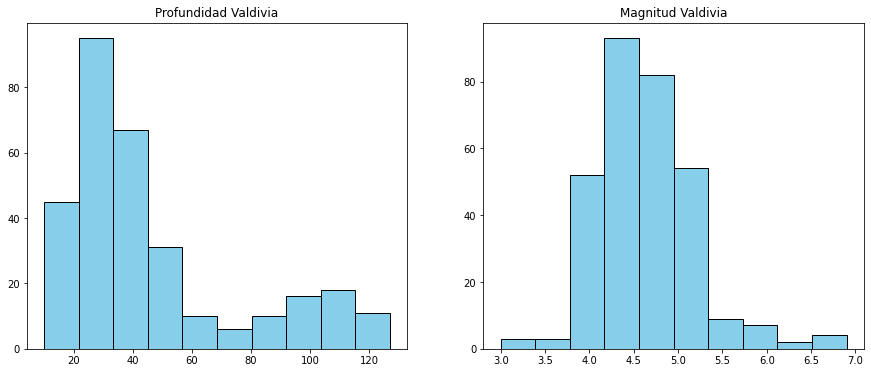

In [39]:
reg1 = pd.read_csv("data/valdivia.csv", sep=";")
print(reg1)
prof_reg1 = reg1['prof']
mag_reg1 = reg1['mag']

fig, axs = plt.subplots(1, 2, figsize=(15,6))


axs[0].hist(prof_reg1, color = 'skyblue', edgecolor = 'black')
axs[0].set_title('Profundidad Valdivia')

axs[1].hist(mag_reg1, color = 'skyblue', edgecolor = 'black')
axs[1].set_title('Magnitud Valdivia')




#### Ajustando una distribución conocida para la profundidad.

(1.5865034622053242, 9.200328028077493, 23.523872712581856)


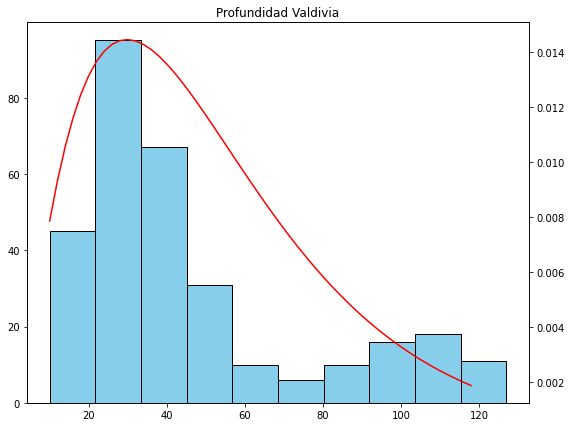

In [37]:
# Se prueba con la distribución gamma
args = stats.gamma.fit(prof_reg1)
fig, ax = plt.subplots()
vec = range(10,120,2)
print(args)

pvec0 = []
for i in vec:
    pvec0.append(stats.gamma.pdf(x=i, a=2.2, loc=args[0], scale=args[2]))
ax.hist(prof_reg1, color = 'skyblue', edgecolor = 'black')  
ax.set_title('Profundidad Valdivia')
ax1 = ax.twinx()
ax1.plot(vec,pvec0,color='red')

In [42]:
datos_gamma = stats.gamma.rvs(*args , size=309)

stats.kstest(prof_reg1, datos_gamma)

KstestResult(statistic=0.0970873786407767, pvalue=0.1086646430768737)

#### Ajustando una distribución conocida para la magnitud.

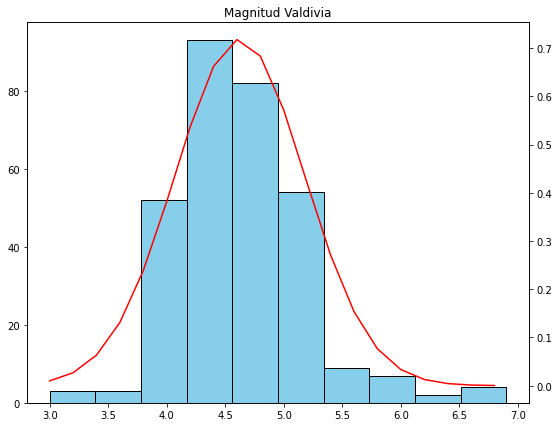

In [45]:
# Se prueba con la distribución normal
mu_reg1, sigma_reg1 = stats.norm.fit(mag_reg1)

fig, ax = plt.subplots()
vec = np.arange(3,7,0.2)

pvec0 = []
for i in vec:
    pvec0.append(stats.norm.pdf(x=i, loc=mu_reg1, scale=sigma_reg1))
ax.hist(mag_reg1, color = 'skyblue', edgecolor = 'black')    
ax.set_title('Magnitud Valdivia')
ax1 = ax.twinx()
ax1.plot(vec,pvec0,color='red')


In [48]:

#stats.kstest(mag_reg1, 'norm', args=(mu_reg1, sigma_reg1))
datos_norm = stats.norm.rvs(loc=mu_reg1, scale=sigma_reg1 , size=309)
stats.kstest(mag_reg1, datos_norm)

KstestResult(statistic=0.10679611650485436, pvalue=0.05888617257950813)

### Datos Región 2: Antofagasta

Text(0.5, 1.0, 'Magnitud Antofagasta')

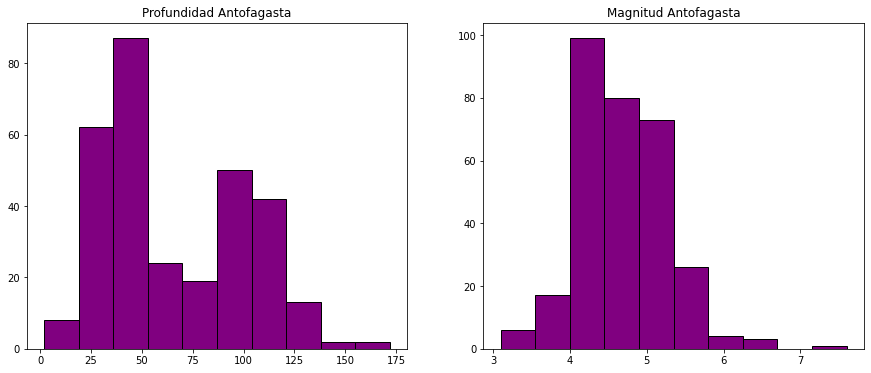

In [50]:
reg2 = pd.read_csv("data/antofagasta.csv", sep=";")[:309]

prof_reg2 = reg2['prof']
mag_reg2 = reg2['mag']

fig, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].hist(prof_reg2, color = 'purple', edgecolor = 'black')
axs[0].set_title('Profundidad Antofagasta')

axs[1].hist(mag_reg2, color = 'purple', edgecolor = 'black')
axs[1].set_title('Magnitud Antofagasta')

#### Ajustando una distribución conocida para la profundidad.

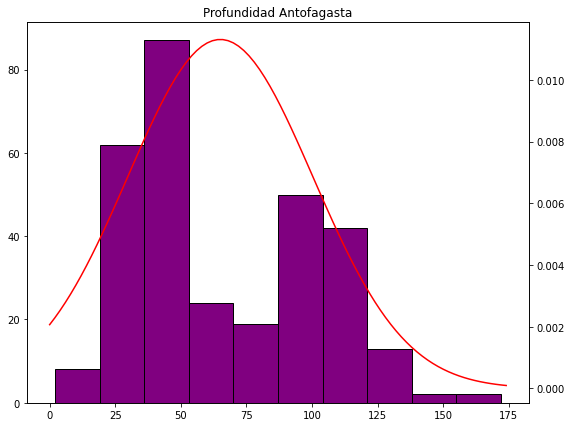

In [51]:
# Se prueba con la distribución normal
args = stats.norm.fit(prof_reg2)
fig, ax = plt.subplots()
vec = range(0,175,2)

pvec0 = []
for i in vec:
    pvec0.append(stats.norm.pdf(x=i, loc=args[0], scale=args[1]))
ax.hist(prof_reg2, color = 'purple', edgecolor = 'black') 
ax.set_title('Profundidad Antofagasta')
ax1 = ax.twinx()
ax1.plot(vec,pvec0,color='red')

In [55]:
datos_norm = stats.norm.rvs(loc=args[0], scale=args[1] , size=309)
stats.kstest(prof_reg2, datos_norm)

KstestResult(statistic=0.1715210355987055, pvalue=0.00021873271245292098)

#### Ajustando una distribución conocida para la magnitud.

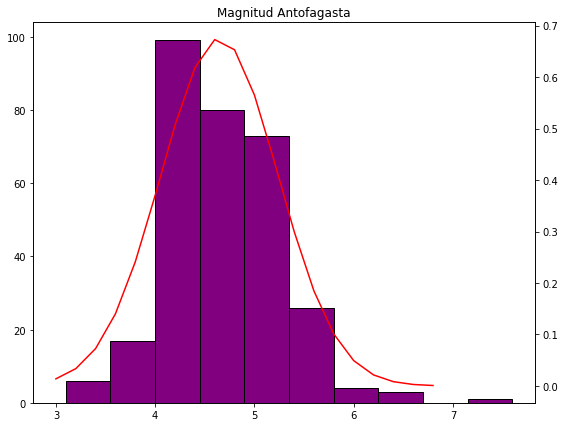

In [59]:
# Se prueba con la distribución normal
args_mag2 = stats.norm.fit(mag_reg2)
fig, ax = plt.subplots()
vec = np.arange(3,7,0.2)

pvec0 = []
for i in vec:
    pvec0.append(stats.norm.pdf(x=i, loc=args_mag2[0], scale=args_mag2[1]))
ax.hist(mag_reg2, color = 'purple', edgecolor = 'black')    
ax.set_title('Magnitud Antofagasta')
ax1 = ax.twinx()
ax1.plot(vec,pvec0,color='red')

In [60]:
datos_norm = stats.norm.rvs(loc=args_mag2[0], scale=args_mag2[1] , size=309)
stats.kstest(mag_reg2, datos_norm)

KstestResult(statistic=0.10032362459546926, pvalue=0.08917504272273033)

### Región 1: Valdivia

In [3]:
# Profundidad
esp_emp = prof_reg1.sum()/prof_reg1.size
var_emp = np.var(prof_reg1)
asim_emp = stats.skew(prof_reg1)
curt_emp = stats.kurtosis(prof_reg1)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  65.0453074433657
Varianza empírica:  1245.0853258763525
Asimetría empírica:  0.4563242308382031
Curtosis empírica:  -1.029281053622597


In [4]:
# Magnitud
esp_emp = mag_reg1.sum()/mag_reg1.size
var_emp = np.var(mag_reg1)
asim_emp = stats.skew(mag_reg1)
curt_emp = stats.kurtosis(mag_reg1)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  4.64789644012945
Varianza empírica:  0.34929169154072537
Asimetría empírica:  0.6799916789242445
Curtosis empírica:  1.62506076873684


En base a los parámetros calculados se puede concluir que en el sector de Valdivia en cuanto a profundidad es esperado que los sismos ocurran a aproxidamente 65 metros con una medida de dispersión relativamente alta lo que indica que los sismos varían mucho en profundidad. En cuanto a magnitud es esperable que ocurran sismos de alrededor de 4.64 grados en la escala de Richter. En cuanto a la dispersión de la magnitud es un valor bastante bajo lo que significa que la mayoría de sismos son de magnitud similar.

### Región 2: Antofagasta

In [5]:
# Profundidad
esp_emp = prof_reg2.sum()/prof_reg2.size
var_emp = np.var(prof_reg2)
asim_emp = stats.skew(prof_reg2)
curt_emp = stats.kurtosis(prof_reg2)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  46.5210355987055
Varianza empírica:  910.9938940731662
Asimetría empírica:  1.205929385032738
Curtosis empírica:  0.28372533138739975


In [6]:
# Magnitud
esp_emp = mag_reg2.sum()/mag_reg2.size
var_emp = np.var(mag_reg2)
asim_emp = stats.skew(mag_reg2)
curt_emp = stats.kurtosis(mag_reg2)
print("Esperanza empírica: ",esp_emp)
print("Varianza empírica: ",var_emp)
print("Asimetría empírica: ",asim_emp)
print("Curtosis empírica: ",curt_emp)

Esperanza empírica:  4.6242718446601945
Varianza empírica:  0.30837527885128985
Asimetría empírica:  0.9553482535550443
Curtosis empírica:  2.280540970774572


En base a los parámetros calculados se puede concluir que en el sector de Antofagasta en cuanto a profundidad es esperado que los sismos ocurran a aproxidamente 46.52 metros con medida de dispersión moderada. En cuanto a magnitud es esperable que ocurran sismos de alrededor de 4.62 grados en la escala de Richter. En cuanto a la dispersión de la magnitud es 0.3, un valor bastante bajo lo que significa que la mayoría de sismos son de magnitud similar.

En general se puede concluir que ambas regiones tienen registros telúricos muy similares a pesar de ubicarse en zonas muy distantes.